In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/home/guiduarte/Documents/01-FaculdadeSemestreAtual/Estatistica/dataset/deaths.csv")
df.columns = df.columns.str.replace('\n\n\n\n\n\n', '')

"""
novo_nome_colunas = {
    'Entity': 'País',
    'Code': 'Código',
    'Year': 'Ano',
    'Meningitis fatalities': 'Meningite',
    'Dementia fatalities': 'Demência',
    'Parkinson s fatalities': 'Parkinson',
    'Nutritional deficiency fatalities': 'Deficiência Nutricional',
    'Malaria fatalities': 'Malária',
    'Drowning fatalities': 'Afogamento',
    'Interpersonal violence fatalities': 'Homicídio',
    'Maternal disorder fatalities': 'Distúrbios Maternos',
    'HIV/AIDS fatalities': 'HIV/AIDS',
    'Drug disorder fatalities': 'Distúrbios por Uso de Drogas',
    'Tuberculosis fatalities': 'Tuberculose',
    'Cardiovascular fatalities': 'Cardiovasculares',
    'Lower respiratory fatalities': 'Doenças Respiratórias Inferiores',
    'Neonatal disorder fatalities': 'Distúrbios Neonatais',
    'Alcohol disorder fatalities': 'Distúrbios Alcoólicos',
    'Self harm fatalities': 'Autoagressão',
    'Forces of nature fatalities': 'Forças da Natureza',
    'Diarrheal disease fatalities': 'Doenças Diarreicas',
    'Environmental exposure fatalities': 'Exposição Ambiental',
    'Neoplasm fatalities': 'Câncer',
    'Conflict fatalities': 'Guerras',
    'Diabetes fatalities': 'Diabetes',
    'Chronic kidney fatalities': 'Insuficiência Renal Crônica',
    'Poisoning fatalities': 'Envenenamento',
    'Protein energy malnutrition fatalities': 'Desnutrição Energético-Protéica',
    'Road injury fatalities': 'Lesões de Trânsito',
    'Chronic respiratory fatalities': 'Doenças Respiratórias Crônicas',
    'Chronic liver fatalities': 'Doenças Hepáticas Crônicas',
    'Digestive disease fatalities': 'Doenças Digestivas',
    'Fire fatalities': 'Incêndio',
    'Acute hepatitis fatalities': 'Hepatite Aguda',
    'Measles fatalities': 'Sarampo'
}
"""

novo_nome_colunas = {
    'Neoplasmas': 'Câncer',
    'Conflitos': 'Guerras'
}

df.rename(columns=novo_nome_colunas, inplace=True)

df.head()

,Entidade,Código,Ano,Meningite,Demência,Parkinson,Deficiência Nutricional,Malária,Afogamento,Violência Interpessoal,...,Insuficiência Renal Crônica,Envenenamento,Desnutrição Energético-Protéica,Lesões de Trânsito,Doenças Respiratórias Crônicas,Doenças Hepáticas Crônicas,Doenças Digestivas,Incêndio,Hepatite Aguda,Sarampo
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,10037
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,10021
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,9807
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,10228
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,12144


In [5]:
df.columns

Index(['Entidade', 'Código', 'Ano', 'Meningite', 'Demência', 'Parkinson',
       'Deficiência Nutricional', 'Malária', 'Afogamento',
       'Violência Interpessoal', 'Distúrbios Maternos', 'HIV/AIDS',
       'Distúrbios por Uso de Drogas', 'Tuberculose',
       'Doenças Cardiovasculares', 'Doenças Respiratórias Inferiores',
       'Distúrbios Neonatais', 'Distúrbios Alcoólicos', 'Autoagressão',
       'Forças da Natureza', 'Doenças Diarreicas', 'Exposição Ambiental',
       'Câncer', 'Guerras', 'Diabetes', 'Insuficiência Renal Crônica',
       'Envenenamento', 'Desnutrição Energético-Protéica',
       'Lesões de Trânsito', 'Doenças Respiratórias Crônicas',
       'Doenças Hepáticas Crônicas', 'Doenças Digestivas', 'Incêndio',
       'Hepatite Aguda', 'Sarampo'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Entidade                          6840 non-null   object
 1   Código                            6840 non-null   object
 2   Ano                               6840 non-null   int64 
 3   Meningite                         6840 non-null   int64 
 4   Demência                          6840 non-null   int64 
 5   Parkinson                         6840 non-null   int64 
 6   Deficiência Nutricional           6840 non-null   int64 
 7   Malária                           6840 non-null   int64 
 8   Afogamento                        6840 non-null   int64 
 9   Violência Interpessoal            6840 non-null   int64 
 10  Distúrbios Maternos               6840 non-null   int64 
 11  HIV/AIDS                          6840 non-null   int64 
 12  Distúrbios por Uso d

In [7]:
df.shape

(6840, 35)

In [8]:
df.describe()

,Ano,Meningite,Demência,Parkinson,Deficiência Nutricional,Malária,Afogamento,Violência Interpessoal,Distúrbios Maternos,HIV/AIDS,...,Insuficiência Renal Crônica,Envenenamento,Desnutrição Energético-Protéica,Lesões de Trânsito,Doenças Respiratórias Crônicas,Doenças Hepáticas Crônicas,Doenças Digestivas,Incêndio,Hepatite Aguda,Sarampo
count,6840.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,6840.000000
mean,2004.500000,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520,9789.471053
std,8.656074,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516,49699.111854
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000,0.000000
50%,2004.500000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000,2.000000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000,773.750000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000,801683.000000


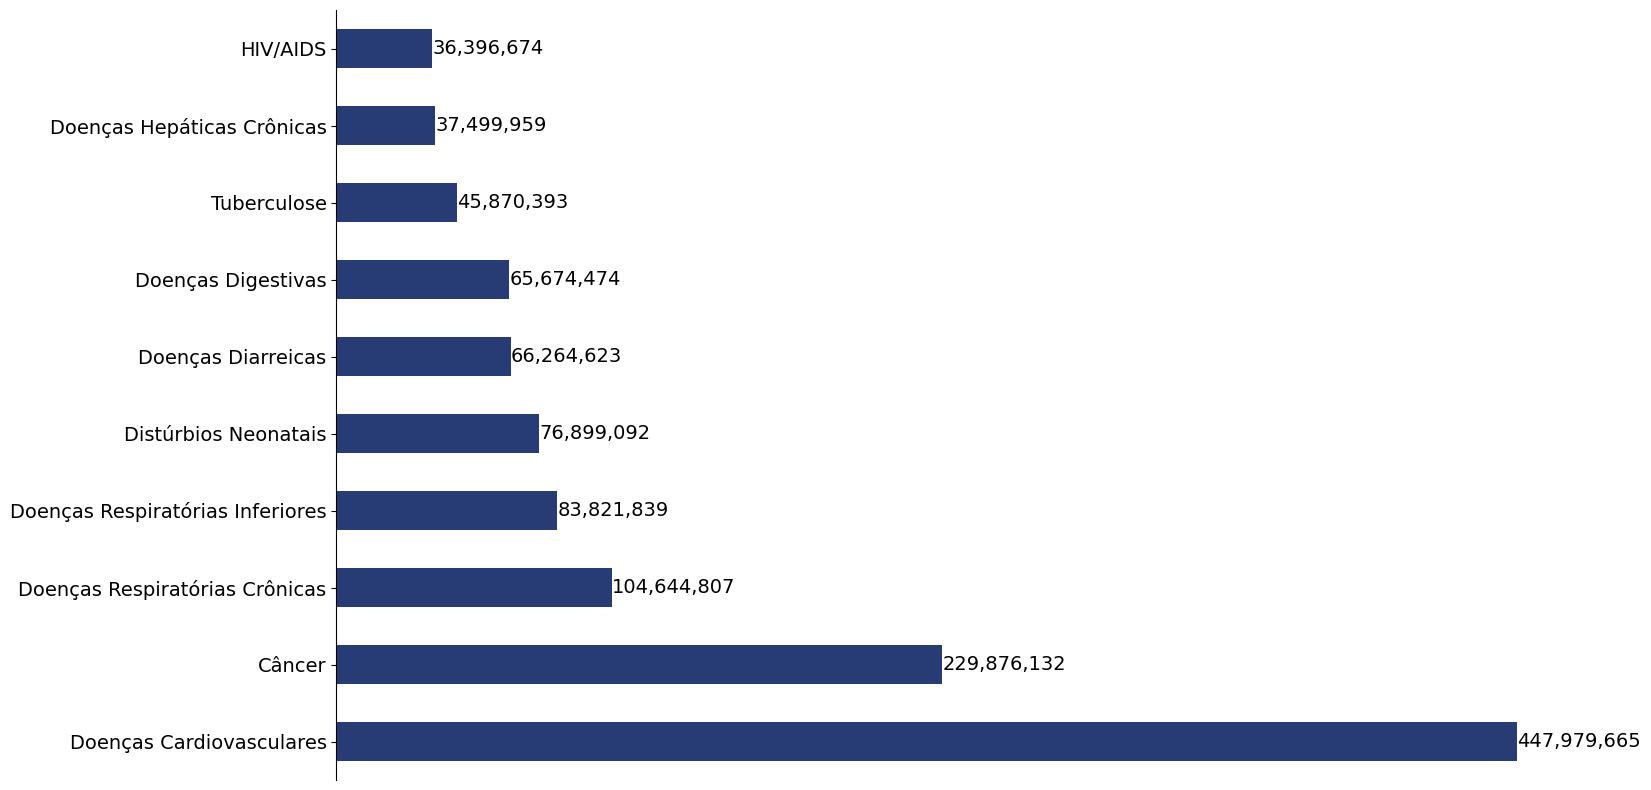

In [9]:
import locale

locale.setlocale(locale.LC_ALL, '')

df_cleaned = df[df['Entidade'] == 'World'].drop(columns=['Código', 'Ano'])

df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

total_deaths_by_cause = df_cleaned.groupby(level=0).sum()

plt.figure(figsize=(16, 10))

total_deaths_by_cause_sorted = total_deaths_by_cause.sum().nlargest(10)

ax = total_deaths_by_cause_sorted.plot(kind='barh', color='#273c75')

plt.grid(axis='x')

for i, v in enumerate(total_deaths_by_cause_sorted):
    formatted_value = locale.format_string("%d", v, grouping=True)
    ax.text(v + 3, i, formatted_value, color='black', ha='left', va='center', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.yticks(fontsize=14)
plt.xticks([])
plt.xlim(0, None)

plt.show()

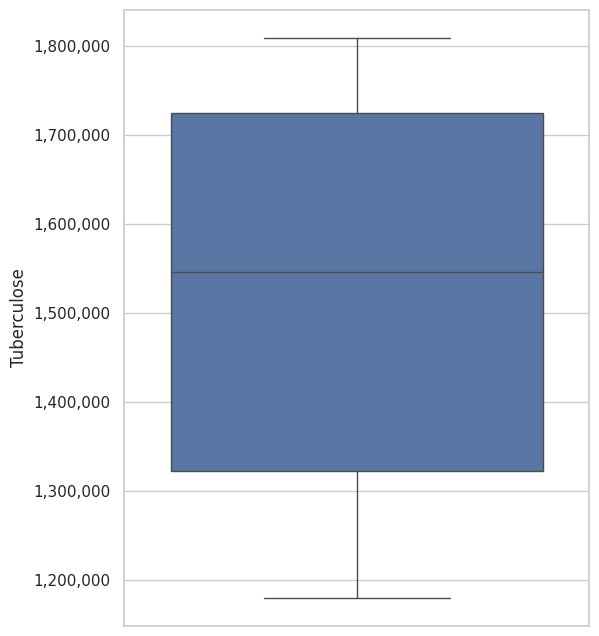

In [10]:
# Filtrando os dados apenas para o país "World"
dados_mundo = df[df['Entidade'] == 'World']

# Ajustando o estilo do seaborn
sns.set(style="whitegrid")

# Plotando o boxplot na vertical
plt.figure(figsize=(6, 8))
ax = sns.boxplot(data=dados_mundo, y='Tuberculose')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))   # type: ignore

plt.show()


In [11]:

# Configurando as opções de exibição para evitar a notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Supondo que 'df' seja o seu DataFrame
tuberculose_data = dados_mundo['Tuberculose']

# Estatísticas de resumo
print("Estatísticas de Resumo para Tuberculose:")
print(tuberculose_data.describe())

Estatísticas de Resumo para Tuberculose:
count        30.000
mean    1529013.100
std      211228.294
min     1179766.000
25%     1322162.250
50%     1546172.000
75%     1724182.500
max     1808478.000
Name: Tuberculose, dtype: float64


In [12]:
tuberculose_por_entidade = df.groupby('Entidade')
tb_pais = tuberculose_por_entidade.get_group('Brazil')['Tuberculose']

print("Estatísticas de Resumo para Tuberculose no Brasil:")
print(tb_pais.describe())

Estatísticas de Resumo para Tuberculose no Brasil:
count     30.000
mean    7441.967
std     1442.047
min     5485.000
25%     6072.500
50%     7226.000
75%     8765.250
max     9951.000
Name: Tuberculose, dtype: float64


In [13]:
mortes_por_pais = df.groupby('Entidade')['Tuberculose'].sum()

top_10_paises = mortes_por_pais.nlargest(25)

print("Top 10 países com mais mortes por tuberculose:")
print(top_10_paises)

mortes_brasil = mortes_por_pais['Brazil']
print("\nNúmero de mortes por tuberculose no Brasil:", mortes_brasil)

Top 10 países com mais mortes por tuberculose:
Entidade
World                               45870393
World Bank Lower Middle Income      30391008
G20                                 24122351
SouthEast Asia Region who           22102298
South Asia wb                       20069206
India                               15820922
SubSaharan Africa wb                13536392
African Region who                  13028578
East Asia & Pacific wb               9601727
World Bank Low Income                9278006
World Bank Upper Middle Income       5523636
Western Pacific Region who           5102219
Eastern Mediterranean Region who     3371275
Indonesia                            3197011
China                                2708461
Pakistan                             2309703
Nigeria                              1769390
Ethiopia                             1739099
Democratic Republic of Congo         1563620
Bangladesh                           1441614
European Region who                  1365541

# Modelagem e Inferencia

In [14]:
# Importando bibliotecas necessárias
import statsmodels.api as sm
import statsmodels.formula.api as smf

Intervalo de confiança para a média de Tuberculose (World): (1450139.1586008705, 1607887.0413991297)
Teste t para a média de Tuberculose (World): estatística t = 39.647859100949184, p-valor = 8.165671131317196e-27
Resumo da Regressão Linear Simples (World):
                            OLS Regression Results                            
Dep. Variable:            Tuberculose   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     591.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           2.25e-20
Time:                        11:46:53   Log-Likelihood:                -363.42
No. Observations:                  30   AIC:                             730.8
Df Residuals:                      28   BIC:                             733.6
Df Model:                           1                                         
Covariance Type:            non

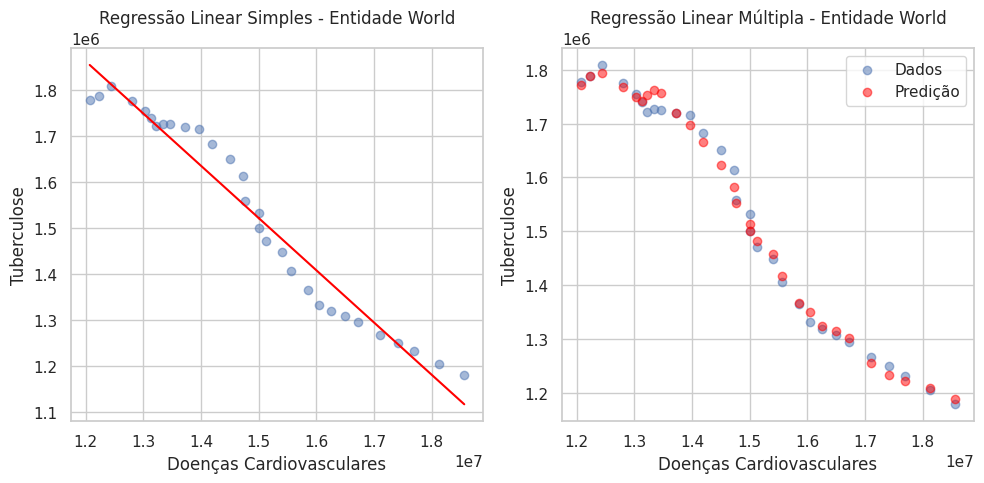

In [20]:
df_world = df[df['Entidade'] == 'World']

# Intervalos de Confiança
conf_interval_tuberculose = stats.t.interval(confidence=0.95, df=len(df_world['Tuberculose'])-1, loc=np.mean(df_world['Tuberculose']), scale=stats.sem(df_world['Tuberculose']))
print(f"Intervalo de confiança para a média de Tuberculose (World): {conf_interval_tuberculose}")

# Teste de Hipótese
t_statistic, p_value = stats.ttest_1samp(df_world['Tuberculose'], 0)
print(f"Teste t para a média de Tuberculose (World): estatística t = {t_statistic}, p-valor = {p_value}")


"""
# Análise de Regressão Linear Simples
X_simple = sm.add_constant(df_world['Doenças Cardiovasculares'])
model_simple = sm.OLS(df_world['Tuberculose'], X_simple).fit()
print("Resumo da Regressão Linear Simples (World):")
print(model_simple.summary())
# Análise de Regressão Linear Múltipla
X_multiple = sm.add_constant(df_world[['Doenças Cardiovasculares', 'Doenças Respiratórias Crônicas', 'Doenças Respiratórias Inferiores']])
model_multiple = sm.OLS(df_world['Tuberculose'], X_multiple).fit()
print("Resumo da Regressão Linear Múltipla (World):")
print(model_multiple.summary())

# Visualização dos resultados
plt.figure(figsize=(10, 5))

# Regressão Linear Simples
plt.subplot(1, 2, 1)
plt.scatter(df_world['Doenças Cardiovasculares'], df_world['Tuberculose'], alpha=0.5)
plt.plot(df_world['Doenças Cardiovasculares'], model_simple.predict(X_simple), color='red')
plt.title('Regressão Linear Simples - Entidade World')
plt.xlabel('Doenças Cardiovasculares')
plt.ylabel('Tuberculose')

# Regressão Linear Múltipla (predição usando Doenças Cardiovasculares, Doenças Respiratórias Crônicas e Doenças Respiratórias Inferior)
plt.subplot(1, 2, 2)
plt.scatter(df_world['Doenças Cardiovasculares'], df_world['Tuberculose'], alpha=0.5, label='Dados')
plt.scatter(df_world['Doenças Cardiovasculares'], model_multiple.predict(X_multiple), color='red', alpha=0.5, label='Predição')
plt.title('Regressão Linear Múltipla - Entidade World')
plt.xlabel('Doenças Cardiovasculares')
plt.ylabel('Tuberculose')
plt.legend()
plt.tight_layout()
plt.show()
"""